![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2016.13.45.png)

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2016.29.55.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from scipy.stats import kurtosis, skew, mode

In [2]:
# Carregar dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Selecionar duas features
features = ['alcohol', 'malic_acid']

In [3]:
def analisar_metrica(dados, nome):
    media = np.mean(dados)
    moda = mode(dados, keepdims=False).mode
    cv = np.std(dados, ddof=1) / media
    curtose = kurtosis(dados)
    assimetria = skew(dados)
    return {
        'Feature': nome,
        'Média': round(media, 2),
        'Moda': round(moda, 2),
        'CV': round(cv, 2),
        'Curtose': round(curtose, 2),
        'Assimetria': round(assimetria, 2)
    }

# Boxplots das features para cada classe e calculo da Media, Moda, CV, Curtose e Assimetria


Classe 0:


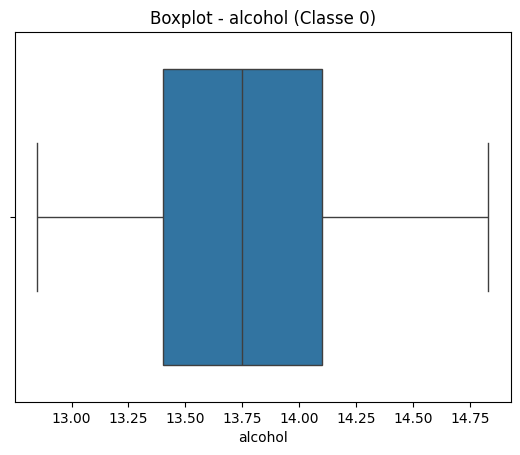

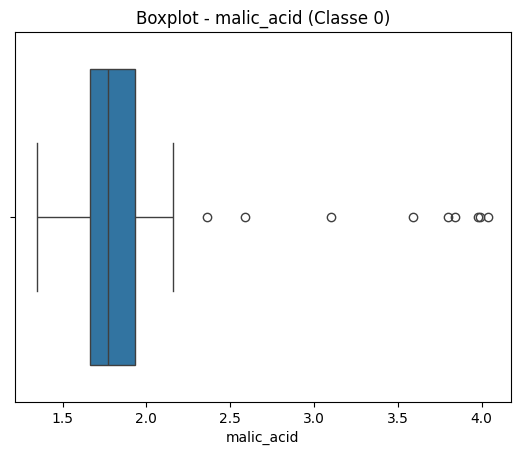

      Feature  Média   Moda    CV  Curtose  Assimetria
0     alcohol  13.74  13.05  0.03    -0.60        0.07
1  malic_acid   2.01   1.73  0.34     3.04        2.08

Classe 1:


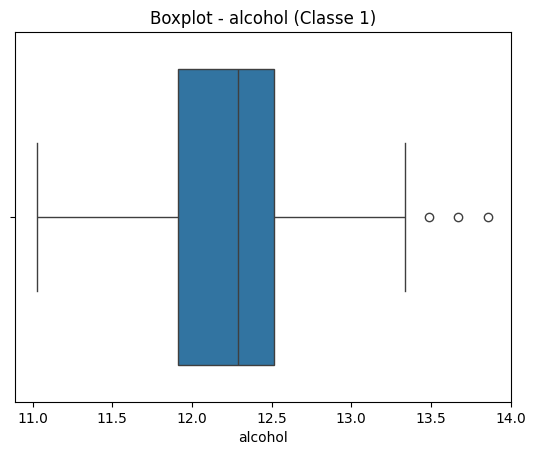

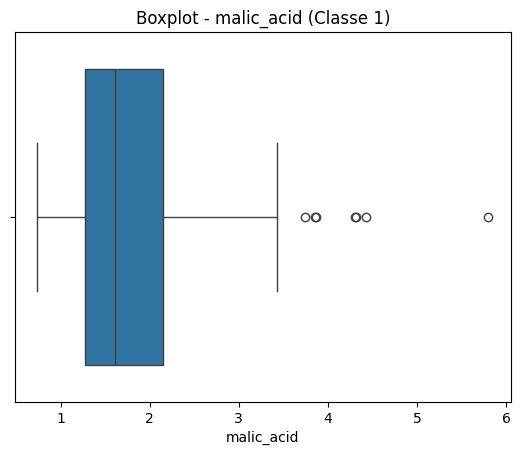

      Feature  Média   Moda    CV  Curtose  Assimetria
0     alcohol  12.28  12.37  0.04     0.61        0.57
1  malic_acid   1.93   1.51  0.53     2.36        1.59

Classe 2:


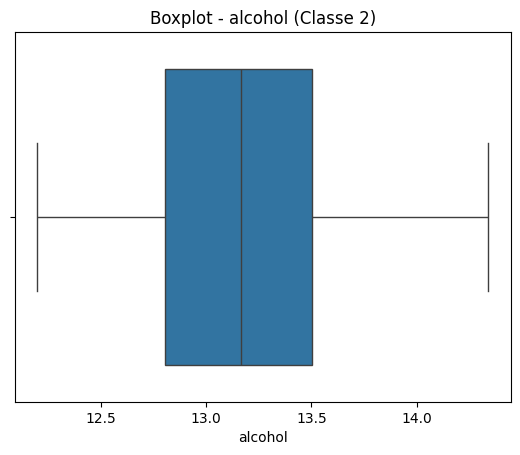

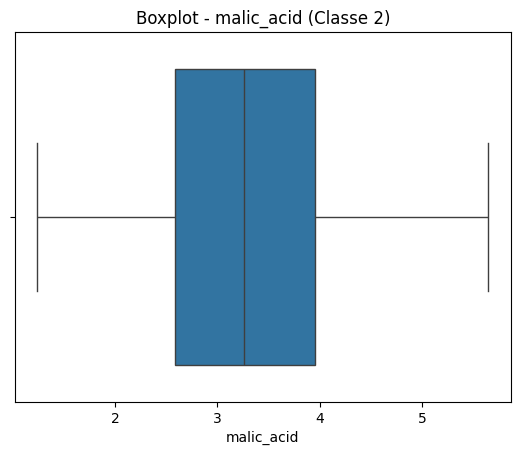

      Feature  Média   Moda    CV  Curtose  Assimetria
0     alcohol  13.15  12.25  0.04    -0.67        0.15
1  malic_acid   3.33   3.03  0.33    -0.42        0.10


In [5]:
for classe in df['target'].unique():
    print(f"\nClasse {classe}:")
    df_classe = df[df['target'] == classe]
    resultados = []
    for feature in features:
        sns.boxplot(data=df_classe, x=feature)
        plt.title(f"Boxplot - {feature} (Classe {classe})")
        plt.show()
        resultados.append(analisar_metrica(df_classe[feature], feature))
    
    print(pd.DataFrame(resultados))


# Inserindo outliers 

In [6]:
df_outlier = df[df['target'] == 0].copy()
df_outlier.loc[df_outlier.sample(3).index, 'malic_acid'] = 20  

# boxplot com outliers

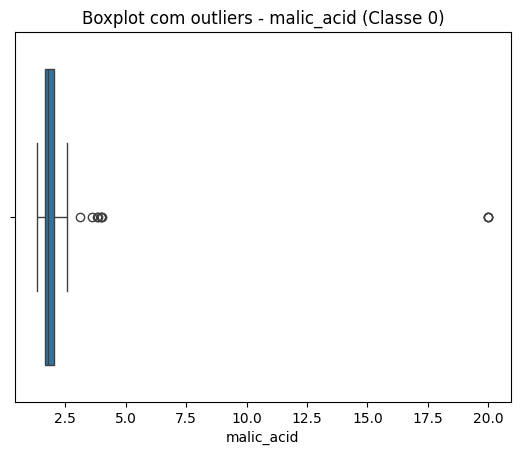


Métricas com outliers:
{'Feature': 'malic_acid', 'Média': 2.94, 'Moda': 1.73, 'CV': 1.38, 'Curtose': 13.72, 'Assimetria': 3.9}


In [7]:
sns.boxplot(data=df_outlier, x='malic_acid')
plt.title("Boxplot com outliers - malic_acid (Classe 0)")
plt.show()

print("\nMétricas com outliers:")
print(analisar_metrica(df_outlier['malic_acid'], 'malic_acid'))
